# CS-344: Artificial Intelligence
## Final Project

Author: Luke Steffen (lhs3)

Version: 05/15/2020

In [0]:
# Imports
from keras.datasets import cifar100
(train_images, train_labels), (test_images, test_labels) = cifar100.load_data()
import matplotlib.pyplot as plt
from keras import layers
from keras import models
from keras.utils import to_categorical

training images         
	count: 50000         
	shape: (50000, 32, 32, 3)         
	image data type: float32         
	label data type: float32
 testing images         
	count: 10000         
	shape: (10000, 32, 32, 3)
 example:         
	pixel value: [0.49411765 0.34901962 0.3137255 ]         
	label value: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]
 example image:


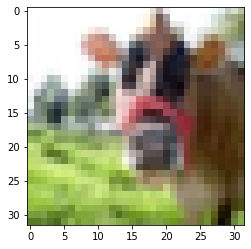

In [28]:
# Examine the data and print an example image

print(
    f'training images \
        \n\tcount: {len(train_labels)} \
        \n\tshape: {train_images.shape} \
        \n\timage data type: {train_images.dtype} \
        \n\tlabel data type: {train_labels.dtype}\n',
    f'testing images \
        \n\tcount: {len(test_labels)} \
        \n\tshape: {test_images.shape}\n',
    f'example: \
        \n\tpixel value: {train_images[0,5,20]} \
        \n\tlabel value: {train_labels[0]}\n',
    'example image:'
)

cifar_image = train_images[0]
plt.imshow(cifar_image, cmap=plt.cm.binary)

In [0]:
# Create labels
# Note: The CIFAR-100 labels are organized alphabetically. This means that the
# labels can be created manually by creating an array of label names and organizing
# them alphabetically. The label names can be found at https://www.cs.toronto.edu/~kriz/cifar.html
labels = ["beaver", "dolphin", "otter", "seal", "whale", "aquarium_fish", "flatfish",
          "ray", "shark", "trout", "orchids", "poppies", "roses", "sunflowers", "tulips",
          "bottles", "bowls", "cans", "cups", "plates", "apples", "mushrooms", "oranges",
          "pears", "sweet_pepper", "clock", "computer_keyboard", "lamp", "telephone",
          "television", "bed", "chair", "couch", "table", "wardrobe", "bee", "beetle",
          "butterfly", "caterpillar", "cockroach", "bear", "leopard", "lion", "tiger", 
          "wolf", "bridge", "castle", "house", "road", "skyscraper", "cloud", "forest", 
          "mountain", "plain", "sea", "camel", "cattle", "chimpanzee", "elephant", 
          "kangaroo", "fox", "porcupine", "possum", "racoon", "skunk", "crab", "lobster", 
          "snail", "spider", "worm", "baby", "boy", "girl", "man", "woman", "crocodile", 
          "dinosaur", "lizard", "snake", "turtle", "hamster", "mouse", "rabbit", "shrew", 
          "squirrel", "maple_tree", "oak_tree", "palm_tree", "pine_tree", "willow_tree", "bicycle", "bus", "motorcycle", 
          "pickup truck", "train", "lawn_mower", "rocket", "streetcar", "tank", "tractor"]

labels.sort()

mapping = {
'aquatic mammals': ['beaver', 'dolphin', 'otter', 'seal', 'whale'],
'fish': ['aquarium_fish', 'flatfish', 'ray', 'shark', 'trout'],
'flowers': ['orchid', 'poppy', 'rose', 'sunflower', 'tulip'],
'food containers': ['bottle', 'bowl', 'can', 'cup', 'plate'],
'fruit and vegetables': ['apple', 'mushroom', 'orange', 'pear', 'sweet_pepper'],
'household electrical device': ['clock', 'computer_keyboard', 'lamp', 'telephone', 'television'],
'household furniture': ['bed', 'chair', 'couch', 'table', 'wardrobe'],
'insects': ['bee', 'beetle', 'butterfly', 'caterpillar', 'cockroach'],
'large carnivores': ['bear', 'leopard', 'lion', 'tiger', 'wolf'],
'large man-made outdoor things': ['bridge', 'castle', 'house', 'road', 'skyscraper'],
'large natural outdoor scenes': ['cloud', 'forest', 'mountain', 'plain', 'sea'],
'large omnivores and herbivores': ['camel', 'cattle', 'chimpanzee', 'elephant', 'kangaroo'],
'medium-sized mammals': ['fox', 'porcupine', 'possum', 'raccoon', 'skunk'],
'non-insect invertebrates': ['crab', 'lobster', 'snail', 'spider', 'worm'],
'people': ['baby', 'boy', 'girl', 'man', 'woman'],
'reptiles': ['crocodile', 'dinosaur', 'lizard', 'snake', 'turtle'],
'small mammals': ['hamster', 'mouse', 'rabbit', 'shrew', 'squirrel'],
'trees': ['maple_tree', 'oak_tree', 'palm_tree', 'pine_tree', 'willow_tree'],
'vehicles 1': ['bicycle', 'bus', 'motorcycle', 'pickup_truck', 'train'],
'vehicles 2': ['lawn_mower', 'rocket', 'streetcar', 'tank', 'tractor'],
}

In [11]:
# Create a model to fit the CIFAR-100 data
model = models.Sequential()

model.add(layers.Conv2D(32, kernel_size=(3, 3), activation="relu", input_shape=(32, 32, 3)))
model.add(layers.Conv2D(64, kernel_size=(3, 3), activation="relu"))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(128, kernel_size=(3, 3), activation="relu"))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(128, kernel_size=(3, 3), activation="relu"))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.25))

model.add(layers.Flatten())
model.add(layers.Dense(1024, activation="relu"))
#model.add(layers.Dropout(0.5))
model.add(layers.Dense(100, activation="softmax"))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 12, 12, 128)       73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 6, 6, 128)         0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 4, 4, 128)        

In [0]:
# Convert data to categorical data
train_images = train_images.reshape((50000, 32, 32, 3))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 32, 32, 3))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [13]:
# Train the model for the program
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=5, batch_size=64)
model.evaluate(test_images, test_labels)

Epoch 1/5
50000/50000 [==============================] - 269s 5ms/step - loss: 3.9256 - accuracy: 0.1009
Epoch 2/5
50000/50000 [==============================] - 263s 5ms/step - loss: 3.2321 - accuracy: 0.2183
Epoch 3/5
50000/50000 [==============================] - 267s 5ms/step - loss: 2.8353 - accuracy: 0.2913
Epoch 4/5
50000/50000 [==============================] - 262s 5ms/step - loss: 2.5698 - accuracy: 0.3456
Epoch 5/5
10000/10000 [==============================] - 15s 1ms/step


[2.514112180709839, 0.36730000376701355]

Image for the model to predict
![Picture](https://drive.google.com/uc?id=18nTMqhPb45Jy2x7kD7B1qmA7AEuKQTTP)

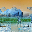

Fine Label: sunflowers


In [57]:
# Use the model to predict an image of a camel
import numpy as np
from PIL import Image
import requests
from io import BytesIO
import cv2
from google.colab.patches import cv2_imshow

response = requests.get("https://drive.google.com/uc?id=18nTMqhPb45Jy2x7kD7B1qmA7AEuKQTTP")
img = Image.open(BytesIO(response.content))
img = np.array(img.getdata()).reshape(img.size[0], img.size[1], 3)
img = img.reshape(img.shape[0], img.shape[1], 3).astype("float32")
img = cv2.resize(img, dsize=(32, 32))

# Note: This shows that image compression is just as important for prediction
cv2_imshow(img)

img = np.expand_dims(img, 0) # make 'batch' of 1

pred = model.predict(img)
print("Fine Label: " + labels[np.argmax(pred)])